## Capstone Project Draft 1_Group5
## Airbnb New York 2019

### Exploratory Data Analysis 

In [756]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

ModuleNotFoundError: No module named 'matplotlib.distplot'

In [450]:
# Load the dataset
file_path = "AB_NYC_2019.csv"  
data = pd.read_csv(file_path)

In [451]:
# Display dataset info
print("\nDataset Information:")
print(data.info())
print("\nFirst Few Rows:")
data.head()


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_revie

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [452]:
# Statistical summary of numerical columns
print("Statistical Summary:")
data.describe()

Statistical Summary:


,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [511]:
# Handling missing values
# Filling missing values in 'reviews_per_month' with 0
data = data.assign(reviews_per_month=data['reviews_per_month'].fillna(0))

# Dropping rows where 'name' or 'host_name' are missing
data = data.dropna(subset=['name', 'host_name'])

In [513]:
# Drop rows where 'name' or 'host_name' are missing
data = data.dropna(subset=['name', 'host_name'])

In [517]:
# Add additional columns for analysis
data['last_review'] = pd.to_datetime(data['last_review'], errors='coerce')
data['last_review_month'] = data['last_review'].dt.month

In [519]:
# Print updated info
print("\nUpdated Dataset Information After Handling Missing Values:")
print(data.info())


Updated Dataset Information After Handling Missing Values:
<class 'pandas.core.frame.DataFrame'>
Index: 48858 entries, 0 to 48894
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              48858 non-null  int64         
 1   name                            48858 non-null  object        
 2   host_id                         48858 non-null  int64         
 3   host_name                       48858 non-null  object        
 4   neighbourhood_group             48858 non-null  object        
 5   neighbourhood                   48858 non-null  object        
 6   latitude                        48858 non-null  float64       
 7   longitude                       48858 non-null  float64       
 8   room_type                       48858 non-null  object        
 9   price                           48858 non-null  int64         
 10  minimum_nights 

### EDA & Visualizations

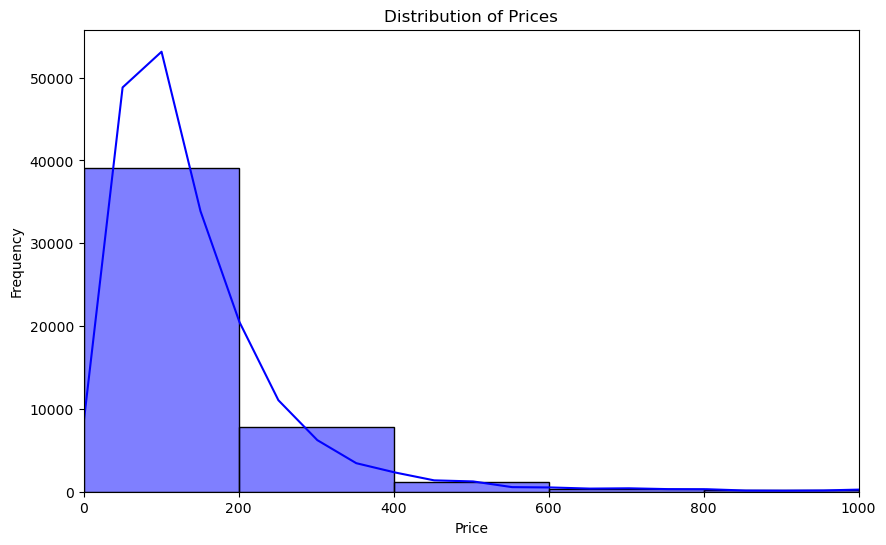

In [522]:
# 1. Distribution of Prices
plt.figure(figsize=(10, 6))
sns.histplot(data['price'], bins=50, kde=True, color='blue')
plt.title('Distribution of Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.xlim(0, 1000) 
plt.show()

/var/folders/yf/p7yy9r517xd4drmjd3xg0glr0000gn/T/ipykernel_18975/2797684856.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='room_type', data=data, palette='Set2')


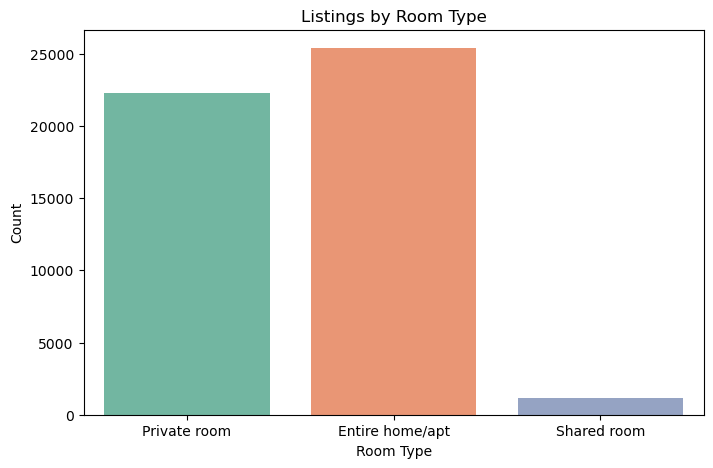

In [524]:
# 2. Listings by Room Type
plt.figure(figsize=(8, 5))
sns.countplot(x='room_type', data=data, palette='Set2')
plt.title('Listings by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.show()

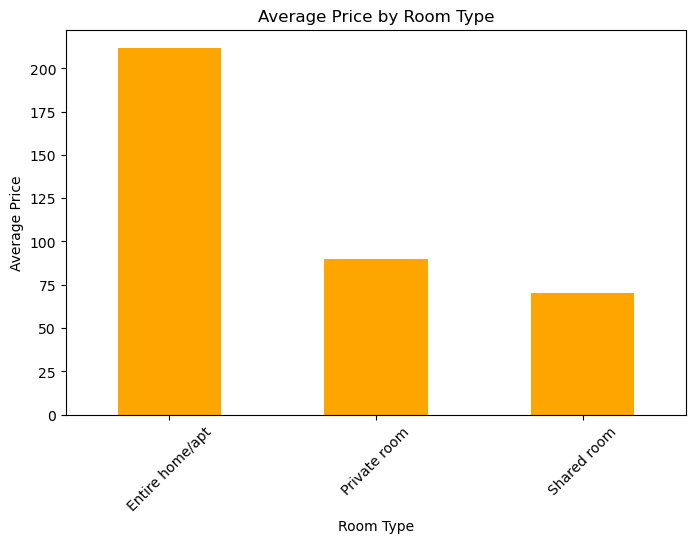

In [526]:
# Average Price by Room Type
room_type_avg_price = data.groupby('room_type')['price'].mean()
plt.figure(figsize=(8, 5))
room_type_avg_price.plot(kind='bar', color='orange')
plt.title('Average Price by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Average Price')
plt.xticks(rotation=45) 
plt.show()

/var/folders/yf/p7yy9r517xd4drmjd3xg0glr0000gn/T/ipykernel_18975/1408709286.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='neighbourhood_group', data=data, palette='viridis')


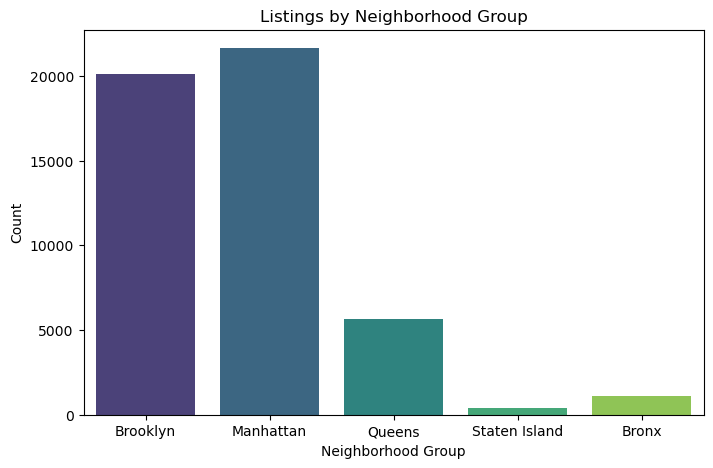

In [528]:
# 3. Listings by Neighborhood Group
plt.figure(figsize=(8, 5))
sns.countplot(x='neighbourhood_group', data=data, palette='viridis')
plt.title('Listings by Neighborhood Group')
plt.xlabel('Neighborhood Group')
plt.ylabel('Count')
plt.show()

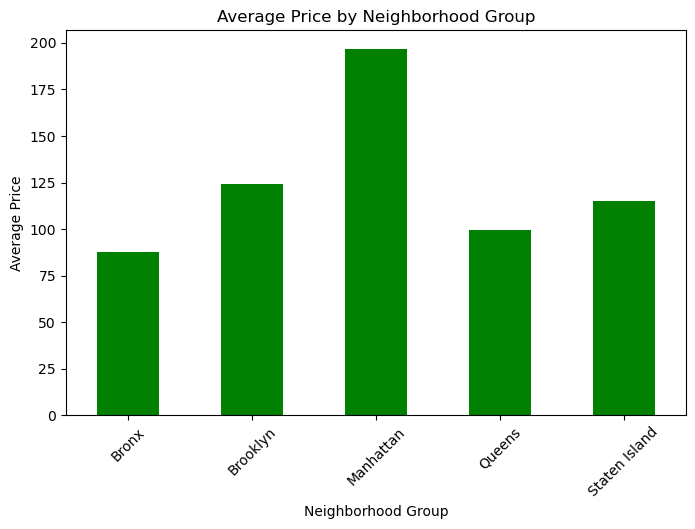

In [564]:
# Average Price by Neighborhood Group
neighborhood_avg_price = data.groupby('neighbourhood_group')['price'].mean()
plt.figure(figsize=(8, 5))
neighborhood_avg_price.plot(kind='bar', color='green')
plt.title('Average Price by Neighborhood Group')
plt.xlabel('Neighborhood Group')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.show()

<Figure size 1000x600 with 0 Axes>

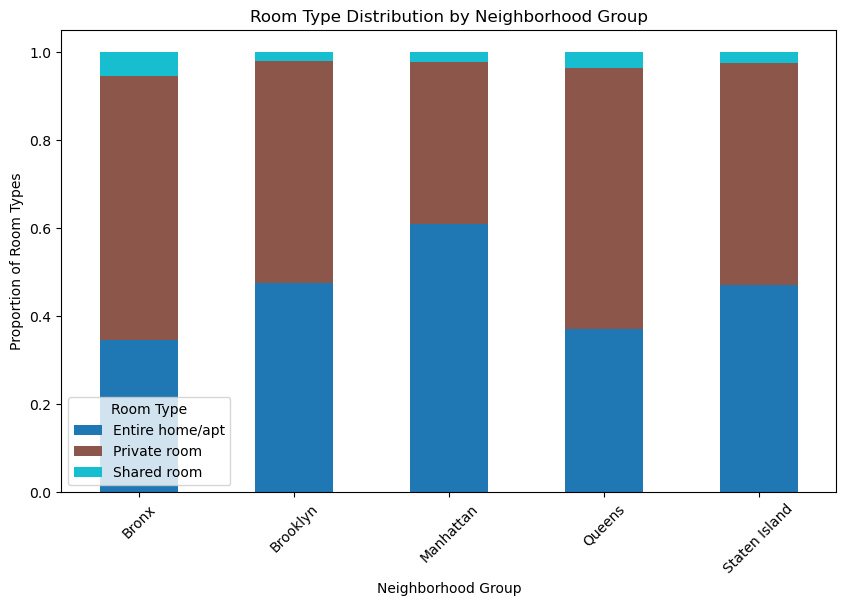

In [562]:
# Room Type Distribution by Neighborhood Group
room_type_distribution = data.groupby(['neighbourhood_group', 'room_type']).size().unstack(fill_value=0)
room_type_distribution_normalized = room_type_distribution.div(room_type_distribution.sum(axis=1), axis=0)

plt.figure(figsize=(10, 6))
room_type_distribution_normalized.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='tab10')
plt.title('Room Type Distribution by Neighborhood Group')
plt.xlabel('Neighborhood Group')
plt.ylabel('Proportion of Room Types')
plt.xticks(rotation=45)
plt.legend(title='Room Type')
plt.show()


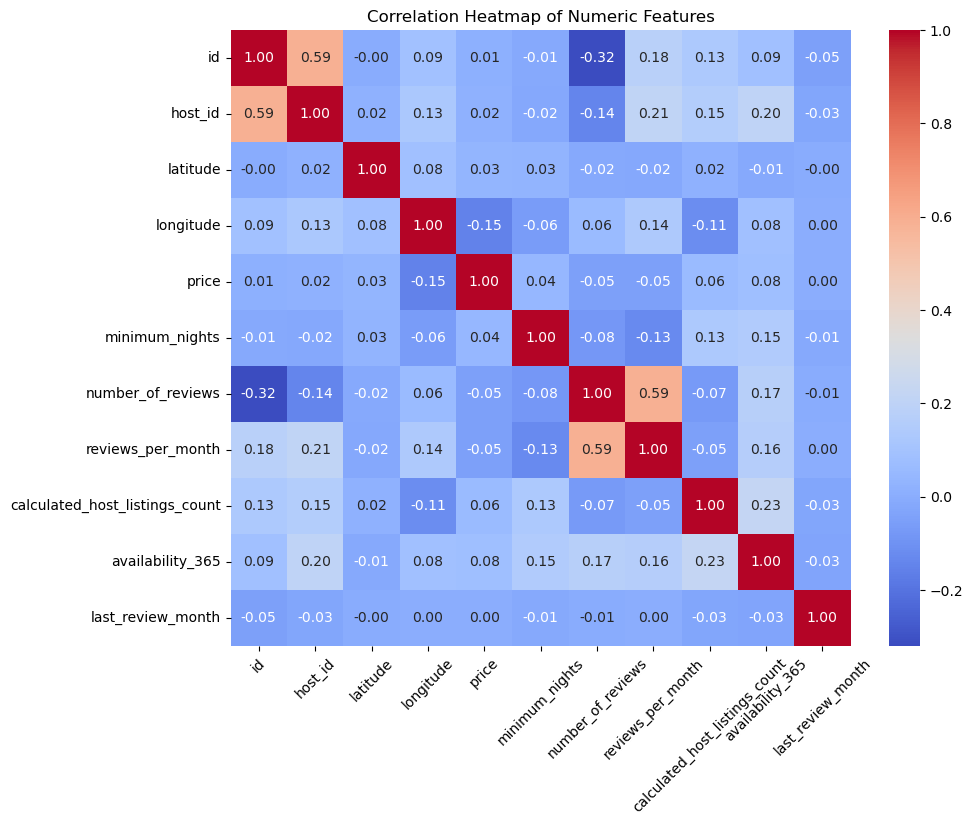

In [534]:
# 4. Correlation Heatmap
plt.figure(figsize=(10, 8))

# Select only numeric columns for correlation
numeric_data = data.select_dtypes(include=[np.number])
correlation_matrix = numeric_data.corr()

# Plot the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numeric Features')
plt.xticks(rotation=45)
plt.show()


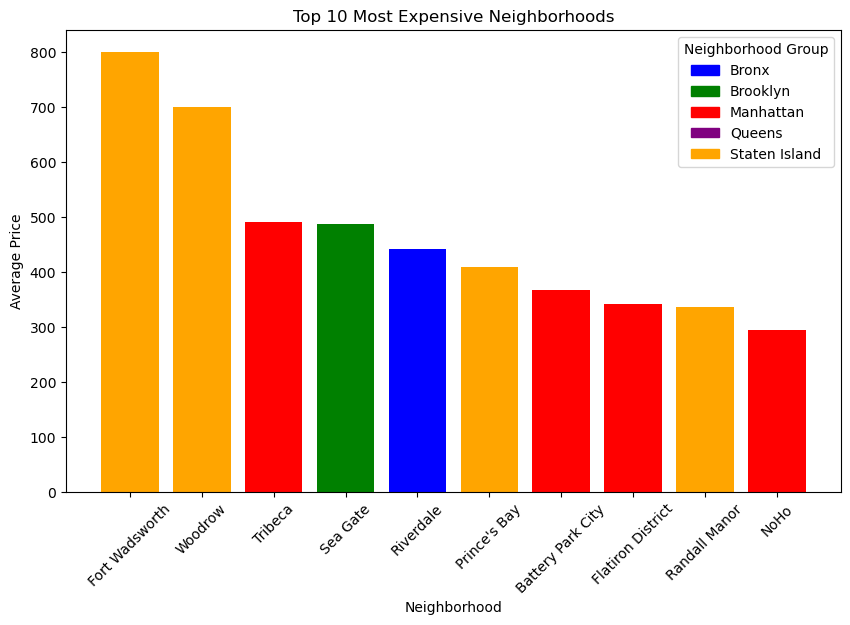

In [558]:
# 5. Top 10 Most Expensive Neighborhoods with Correct Neighborhood Group Colors
top_10_expensive_neighborhoods = (
    data.groupby(['neighbourhood', 'neighbourhood_group'])['price']
    .mean()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
)

# Define a consistent color mapping for all neighborhood groups
colors = {'Bronx': 'blue', 'Brooklyn': 'green', 'Manhattan': 'red', 'Queens': 'purple', 'Staten Island': 'orange'}

# Map colors to the neighborhood groups
bar_colors = top_10_expensive_neighborhoods['neighbourhood_group'].map(colors)

# Plot with proper colors and legend
plt.figure(figsize=(10, 6))
bars = plt.bar(
    top_10_expensive_neighborhoods['neighbourhood'],
    top_10_expensive_neighborhoods['price'],
    color=bar_colors
)

# Create a legend for neighborhood groups
handles = [plt.Rectangle((0, 0), 1, 1, color=color) for color in colors.values()]
labels = colors.keys()
plt.legend(handles, labels, title='Neighborhood Group')

# Add titles and labels
plt.title('Top 10 Most Expensive Neighborhoods')
plt.xlabel('Neighborhood')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.show()


### Analysis for Questions to Investigate

Object `year` not found.


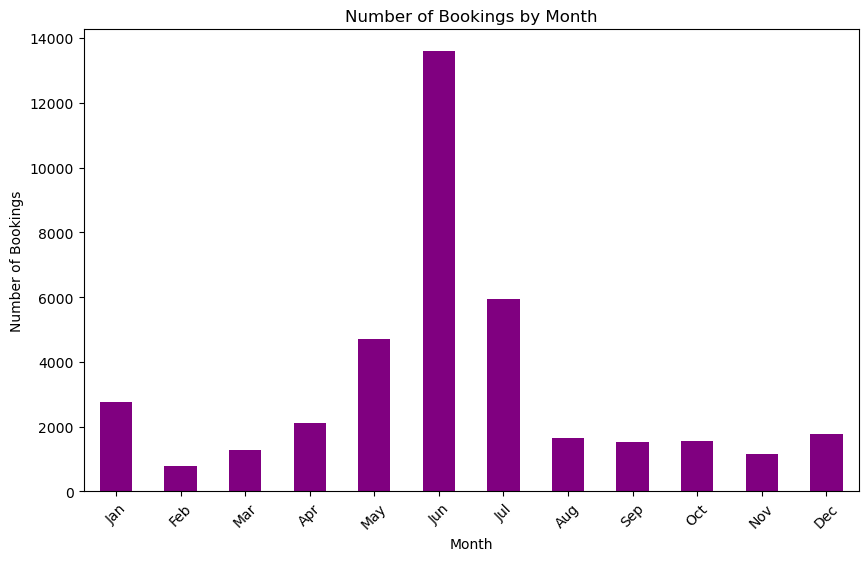

In [539]:
When do most bookings happen during the year?
monthly_bookings = data.groupby('last_review_month')['id'].count()
plt.figure(figsize=(10, 6))
monthly_bookings.plot(kind='bar', color='purple')
plt.title('Number of Bookings by Month')
plt.xlabel('Month')
plt.ylabel('Number of Bookings')
plt.xticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.show()

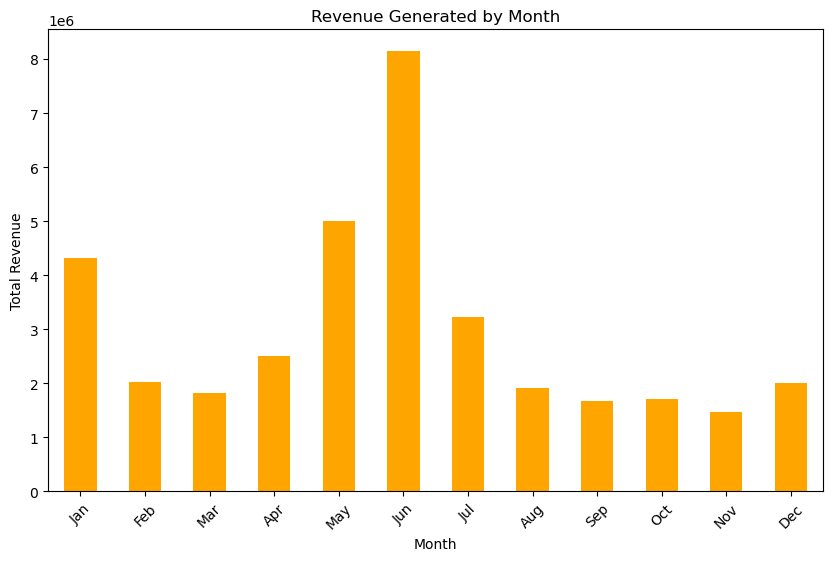

In [623]:
# 7. When is the most revenue generated?
data['total revenue'] = data['price'] * data['minimum_nights']
monthly_revenue = data.groupby('last_review_month')['total revenue'].sum()
plt.figure(figsize=(10, 6))
monthly_revenue.plot(kind='bar', color='orange')
plt.title('Revenue Generated by Month')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.xticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.show()

In [629]:
# 8. Top 5 Listings by Revenue
top_5_listings = data.nlargest(5, 'total revenue')[['name', 'host_name', 'total revenue']]
print("\nTop 5 Listings by Revenue:")
print(top_5_listings)


Top 5 Listings by Revenue:
                                               name host_name  total revenue
48043  Luxury TriBeCa Apartment at an amazing price     Jenny        1170000
9151            Furnished room in Astoria apartment  Kathrine        1000000
12342           Quiet, Clean, Lit @ LES & Chinatown       Amy         989901
17811                  Gorgeous 2 Bedroom apartment     Iveta         857750
44429            Room with sofa bed or air mattress    Noelle         730000


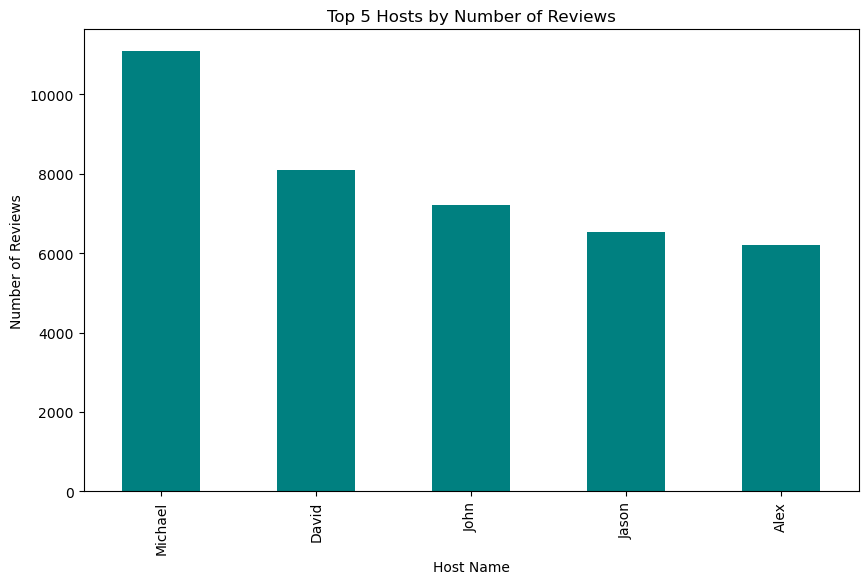

In [631]:
# 9. Who are the top hosts based on reviews?
top_hosts = data.groupby('host_name')['number_of_reviews'].sum().sort_values(ascending=False).head(5)
plt.figure(figsize=(10, 6))
top_hosts.plot(kind='bar', color='teal')
plt.title('Top 5 Hosts by Number of Reviews')
plt.xlabel('Host Name')
plt.ylabel('Number of Reviews')
plt.show()

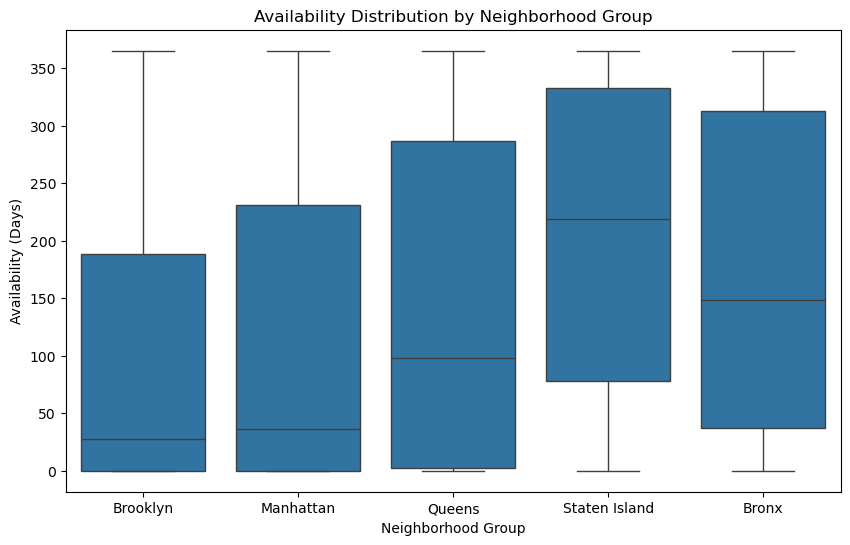

In [633]:
# 10. Relationship Between Neighborhood and Availability
plt.figure(figsize=(10, 6))
sns.boxplot(x='neighbourhood_group', y='availability_365', data=data)
plt.title('Availability Distribution by Neighborhood Group')
plt.xlabel('Neighborhood Group')
plt.ylabel('Availability (Days)')
plt.show()

# Predictive Model

### 1. Linear Regression Model
Fit a regression line through the training data using statsmodels. Remember that in statsmodels, you need to explicitly fit a constant using sm.add_constant(X) because if we don't perform this step, statsmodels fits a regression line passing through the origin, by default.

#### Step 1: Cleaning the data to a desired subset of desired idnependent variables

As you know, the first basic step for regression is cleaning the data to have minimal redundant and unwanted data.
For this case we are to consider a few variables such as:
- neighbourhood group 
- instant_bookable
- room type
- Construction year 
- cancellation_policy
- service fee
- number of reviews
- minimum nights

In [579]:
data['neighbourhood_group'].unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [587]:
# creating a copy to work on linearRegression
lnr_data = data.copy()
print(f"Missing values in 'neighbourhood group': {lnr_data['neighbourhood_group'].isna().sum()}")

Missing values in 'neighbourhood group': 0


In [595]:
lnr_data['price'] = lnr_data['price'].fillna(lnr_data['price'].mean())

In [597]:
lnr_data['number_of_reviews']= lnr_data['number_of_reviews'].fillna(0)

In [599]:
lnr_data['reviews_per_month']= lnr_data['reviews_per_month'].fillna(0)

In [601]:
lnr_data['minimum_nights']= lnr_data['minimum_nights'].fillna(0)             

In [605]:
lnr_data['availability_365']= lnr_data['availability_365'].fillna(0)  

In [607]:
ng_dummies = pd.get_dummies(lnr_data['neighbourhood_group'], prefix='n_group', drop_first=True).astype(int)
lnr_data =pd.concat([lnr_data, ng_dummies], axis=1)
lnr_data =lnr_data.drop(columns=['neighbourhood_group'])

In [617]:
room_dummies = pd.get_dummies(lnr_data['room_type'], prefix='room_type', drop_first=True).astype(int)
lnr_data =pd.concat([lnr_data, room_dummies], axis=1)
lnr_data =lnr_data.drop(columns=['room_type'])

In [615]:
lnr_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48858 entries, 0 to 48894
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              48858 non-null  int64         
 1   name                            48858 non-null  object        
 2   host_id                         48858 non-null  int64         
 3   host_name                       48858 non-null  object        
 4   neighbourhood                   48858 non-null  object        
 5   latitude                        48858 non-null  float64       
 6   longitude                       48858 non-null  float64       
 7   room_type                       48858 non-null  object        
 8   price                           48858 non-null  int64         
 9   minimum_nights                  48858 non-null  int64         
 10  number_of_reviews               48858 non-null  int64         
 11  last_re

In [619]:
print("% of NULL values in each column")
round(100*(lnr_data.isnull().sum()/len(data.index)), 2)

% of NULL values in each column


id                                 0.00
name                               0.00
host_id                            0.00
host_name                          0.00
neighbourhood                      0.00
latitude                           0.00
longitude                          0.00
price                              0.00
minimum_nights                     0.00
number_of_reviews                  0.00
last_review                       20.54
reviews_per_month                  0.00
calculated_host_listings_count     0.00
availability_365                   0.00
last review                       20.54
last_review_month                 20.54
total revenue                      0.00
n_group_Brooklyn                   0.00
n_group_Manhattan                  0.00
n_group_Queens                     0.00
n_group_Staten Island              0.00
room_type_Private room             0.00
room_type_Shared room              0.00
dtype: float64

#### Step 2: Splitting the Data into Training and Testing Sets

As you know, the first basic step for regression is performing a train-test split.

In [635]:
from sklearn.model_selection import train_test_split
y = lnr_data['price']
X = lnr_data[[
    'minimum_nights', 
    'number_of_reviews',
    'availability_365',
    'room_type_Shared room',
    'room_type_Private room', 
    'n_group_Brooklyn',
    'n_group_Manhattan',
    'n_group_Queens',                    
    'n_group_Staten Island',
]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [637]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14658 entries, 5880 to 30674
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   minimum_nights          14658 non-null  int64
 1   number_of_reviews       14658 non-null  int64
 2   availability_365        14658 non-null  int64
 3   room_type_Shared room   14658 non-null  int64
 4   room_type_Private room  14658 non-null  int64
 5   n_group_Brooklyn        14658 non-null  int64
 6   n_group_Manhattan       14658 non-null  int64
 7   n_group_Queens          14658 non-null  int64
 8   n_group_Staten Island   14658 non-null  int64
dtypes: int64(9)
memory usage: 1.1 MB


Since few columns have varying range, applying scaling to make it between 0-1.

In [639]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['minimum_nights','number_of_reviews','availability_365']

X_train[num_vars] = scaler.fit_transform(X_train[num_vars])

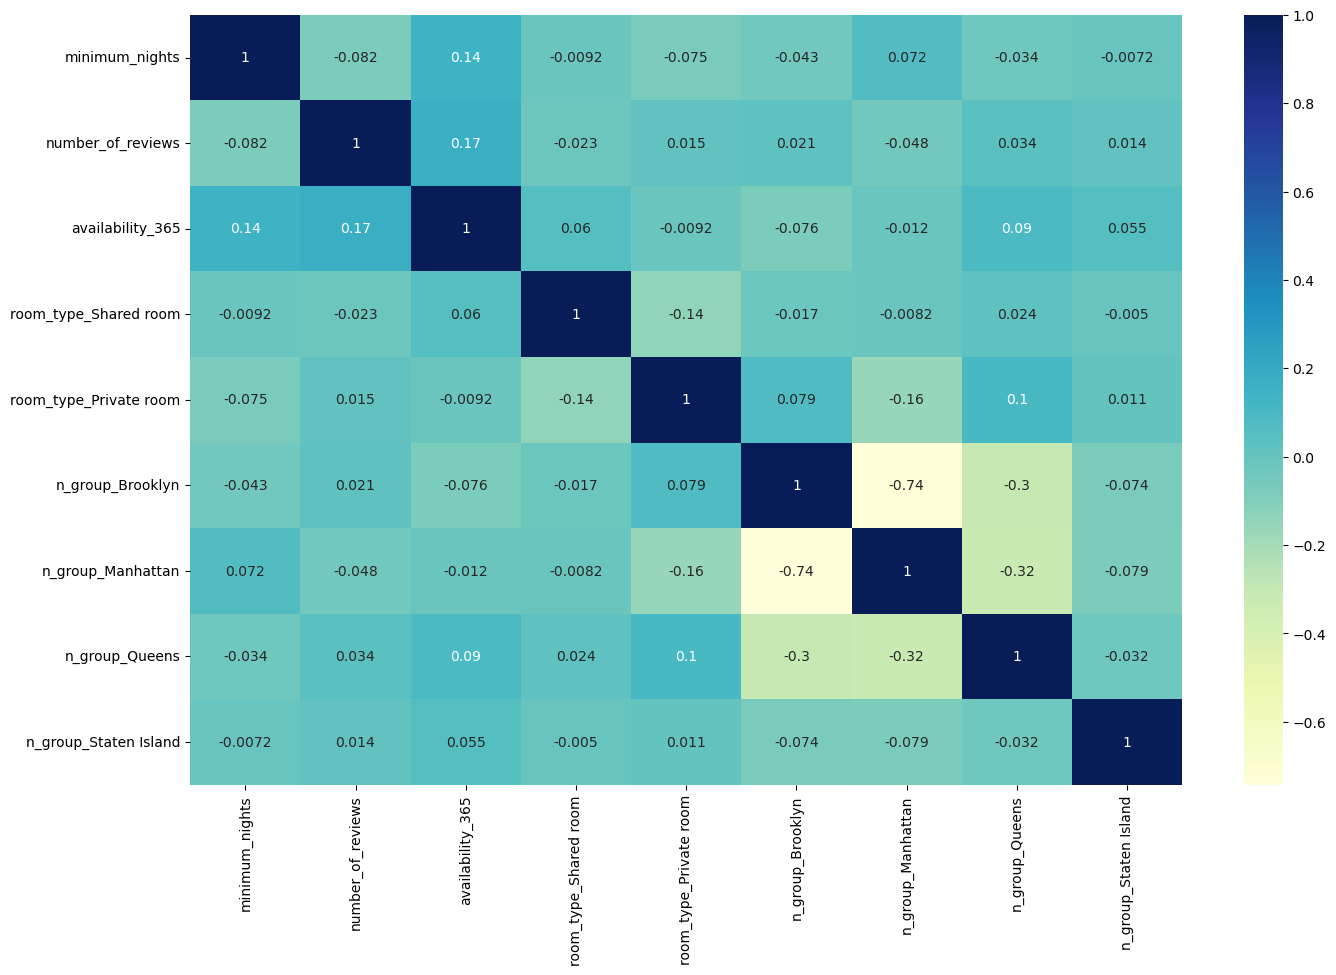

In [641]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (16, 10))
sns.heatmap(X_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

As we can notice, the corelation between the columns that has been chosen is well within the desired range. If not, desired columns can be dropped to fcilitate a better efficiency

#### Step 3: Building the model

In [668]:
import statsmodels.api as sm

# Add a constant
X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

In [670]:
lr.params

const                     137.926891
minimum_nights           -121.129264
number_of_reviews        -202.225570
availability_365           70.276346
room_type_Shared room    -149.054052
room_type_Private room   -111.007054
n_group_Brooklyn           35.652384
n_group_Manhattan          90.483740
n_group_Queens             12.269825
n_group_Staten Island      14.671094
dtype: float64

In [672]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.094
Model:                            OLS   Adj. R-squared:                  0.094
Method:                 Least Squares   F-statistic:                     394.3
Date:                Sun, 09 Feb 2025   Prob (F-statistic):               0.00
Time:                        12:59:46   Log-Likelihood:            -2.3439e+05
No. Observations:               34200   AIC:                         4.688e+05
Df Residuals:                   34190   BIC:                         4.689e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                    137.9269      8.577     16.081      0.000     121.116     154.738
minimum_nights          -121.1293     64.232     -1.886      0.059    -247.026       4.768
number_of_reviews       -202.2256     17.845    -11.332      0.000    -237.202    -167.249
availability_365          70.2763      3.575     19.658      0.000      63.269      77.284
room_type_Shared room   -149.0541      8.311    -17.934      0.000    -165.344    -132.764
room_type_Private room  -111.0071      2.561    -43.350      0.000    -116.026    -105.988
n_group_Brooklyn          35.6524      8.507      4.191      0.000      18.978      52.327
n_group_Manhattan         90.4837      8.506     10.637      0.000      73.811     107.156
n_group_Queens            12.2698      9.012      1.361      0.173      -5.394      29.934
n_group_Staten Island     14.6711     16.260      0.902      0.367     -17.198      46.541
==============================================================================
Omnibus:                    76076.836   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        612273268.014
Skew:                          20.707   Prob(JB):                         0.00
Kurtosis:                     657.179   Cond. No.                         68.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Checking VIF

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating `VIF` is:

#### $ VIF_i = \frac{1}{1 - {R_i}^2} $

In [675]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [677]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,room_type_Private room,1.87
2,availability_365,1.82
5,n_group_Brooklyn,1.75
6,n_group_Manhattan,1.65
7,n_group_Queens,1.34
1,number_of_reviews,1.33
0,minimum_nights,1.14
3,room_type_Shared room,1.05
8,n_group_Staten Island,1.03


#### Dropping unwanted variables and updating the model
As you can see from the summary and the VIF dataframe, some variables are still insignificant. 
Some variables have a very high p-value and some a high VIF. 

We generally want a VIF that is less than 5 and a p-value less than 0.05.
Let's go ahead and drop these variables

In [680]:
X_lr2 = X_train.drop('n_group_Staten Island',axis=1)

In [682]:
# Build a third fitted model
X_train_lm2 = sm.add_constant(X_lr2)

lr_2 = sm.OLS(y_train, X_train_lm2).fit()

In [684]:
# Print the summary of the model
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.094
Model:                            OLS   Adj. R-squared:                  0.094
Method:                 Least Squares   F-statistic:                     443.5
Date:                Sun, 09 Feb 2025   Prob (F-statistic):               0.00
Time:                        12:59:58   Log-Likelihood:            -2.3439e+05
No. Observations:               34200   AIC:                         4.688e+05
Df Residuals:                   34191   BIC:                         4.689e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                    141

In [686]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X_lr2.columns
vif['VIF'] = [variance_inflation_factor(X_lr2.values, i) for i in range(X_lr2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,room_type_Private room,1.86
2,availability_365,1.80
5,n_group_Brooklyn,1.73
6,n_group_Manhattan,1.63
1,number_of_reviews,1.33
7,n_group_Queens,1.33
0,minimum_nights,1.14
3,room_type_Shared room,1.05


The VIFs are all in the desired range now. Dropping more columns with high p-value.

In [689]:
X_lr3 = X_train_lm2.drop('n_group_Queens',axis=1)
X_train_lm3 = sm.add_constant(X_lr3)

lr_3 = sm.OLS(y_train, X_train_lm3).fit()
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.094
Model:                            OLS   Adj. R-squared:                  0.094
Method:                 Least Squares   F-statistic:                     506.7
Date:                Sun, 09 Feb 2025   Prob (F-statistic):               0.00
Time:                        13:00:07   Log-Likelihood:            -2.3439e+05
No. Observations:               34200   AIC:                         4.688e+05
Df Residuals:                   34192   BIC:                         4.689e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                    148

#### Step 4: Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

/var/folders/yf/p7yy9r517xd4drmjd3xg0glr0000gn/T/ipykernel_18975/4132990195.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_train - y_train_price), bins = 20)


Text(0.5, 0, 'Errors')

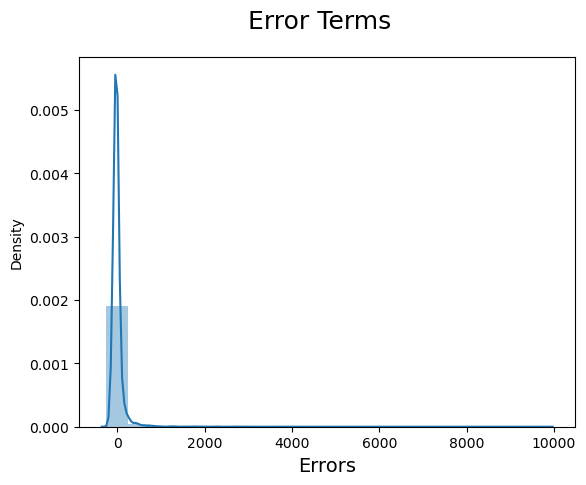

In [760]:
y_train_price = lr_3.predict(X_train_lm3)
# Plot the histogram of the error terms
fig = plt.figure()
# sns.histplot((y_train - y_train_price), bins=5000, kde=True)
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 18)                  # Plot heading 
plt.xlabel('Errors', fontsize = 14)                         # X-label

In [697]:
# Adding constant variable to test dataframe

X_test[num_vars] = scaler.transform(X_test[num_vars])
X_test.info()
X_test_m3 = sm.add_constant(X_test)

<class 'pandas.core.frame.DataFrame'>
Index: 14658 entries, 5880 to 30674
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   minimum_nights          14658 non-null  float64
 1   number_of_reviews       14658 non-null  float64
 2   availability_365        14658 non-null  float64
 3   room_type_Shared room   14658 non-null  int64  
 4   room_type_Private room  14658 non-null  int64  
 5   n_group_Brooklyn        14658 non-null  int64  
 6   n_group_Manhattan       14658 non-null  int64  
 7   n_group_Queens          14658 non-null  int64  
 8   n_group_Staten Island   14658 non-null  int64  
dtypes: float64(3), int64(6)
memory usage: 1.1 MB


In [699]:
# Creating X_test_m11 dataframe by dropping variables from X_test_m11

X_test_m3 = X_test_m3.drop(['n_group_Queens','n_group_Staten Island'], axis = 1)

In [701]:
# Making predictions using the final model

y_pred_m3 = lr_3.predict(X_test_m3)

Text(0, 0.5, 'y_pred')

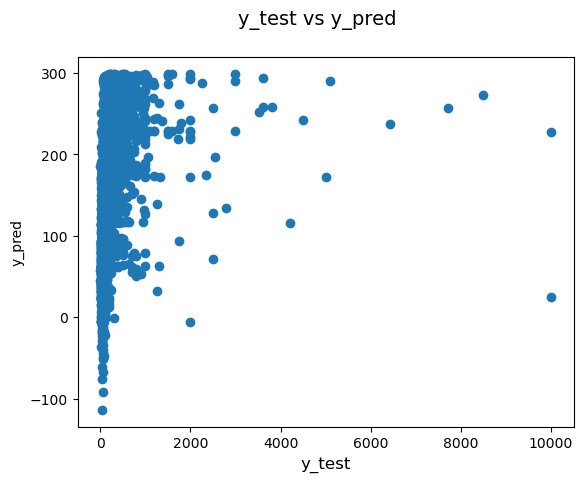

In [703]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred_m3)
fig.suptitle('y_test vs y_pred', fontsize = 14)              # Plot heading 
plt.xlabel('y_test', fontsize = 12)                          # X-label
plt.ylabel('y_pred', fontsize = 10)      

#### Models to find the relation between location and popularity

In [742]:
# Relation between number of reviews and location(ne)
X1 = lnr_data[['price', 'n_group_Brooklyn', 'n_group_Manhattan', 'n_group_Queens', 'n_group_Staten Island']]

y1 = lnr_data['number_of_reviews']
X1 = sm.add_constant(X1)
model1 = sm.OLS(y1, X1).fit()

print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:      number_of_reviews   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     43.39
Date:                Sun, 09 Feb 2025   Prob (F-statistic):           8.51e-45
Time:                        13:19:07   Log-Likelihood:            -2.5471e+05
No. Observations:               48858   AIC:                         5.094e+05
Df Residuals:                   48852   BIC:                         5.095e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    26.67

In [740]:
# Relation between review frequency and location(neighbourhood)
X2 = lnr_data[['price', 'number_of_reviews', 'n_group_Brooklyn', 'n_group_Manhattan', 'n_group_Queens', 'n_group_Staten Island']]
y2 = lnr_data['reviews_per_month']

X2 = sm.add_constant(X2)

model2 = sm.OLS(y2, X2).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:      reviews_per_month   R-squared:                       0.357
Model:                            OLS   Adj. R-squared:                  0.357
Method:                 Least Squares   F-statistic:                     4513.
Date:                Sun, 09 Feb 2025   Prob (F-statistic):               0.00
Time:                        13:11:17   Log-Likelihood:                -81431.
No. Observations:               48858   AIC:                         1.629e+05
Df Residuals:                   48851   BIC:                         1.629e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.93

### 2. Random Forest Model

In [714]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [716]:
df = pd.read_csv("AB_NYC_2019.csv")

In [718]:
# Feature selection & splitting the dataset
features = ['room_type', 'neighbourhood_group', 'availability_365', 'number_of_reviews']
X = df[features]
y = df['price']

In [720]:
from sklearn.preprocessing import OneHotEncoder

# Selecting features
features = ['room_type', 'neighbourhood_group', 'availability_365', 'number_of_reviews']
X = df[features]
y = df['price']

# One-hot encoding categorical variables
encoder = OneHotEncoder(drop='first', sparse_output=False)  # Updated parameter
X_encoded = pd.DataFrame(encoder.fit_transform(X[['room_type', 'neighbourhood_group']]))
X_encoded.columns = encoder.get_feature_names_out()

# Drop original categorical columns and concatenate encoded features
X = X.drop(['room_type', 'neighbourhood_group'], axis=1)
X = pd.concat([X, X_encoded], axis=1)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [722]:
# Building the Random Forest Regression model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [723]:
# Model Evaluation
y_pred = rf_model.predict(X_test)
print(f"MAE: {mean_absolute_error(y_test, y_pred)}")
print(f"MSE: {mean_squared_error(y_test, y_pred)}")
print(f"R-squared: {r2_score(y_test, y_pred)}")

MAE: 75.42555808251875
MSE: 45857.45785883867
R-squared: -0.036602270378758295


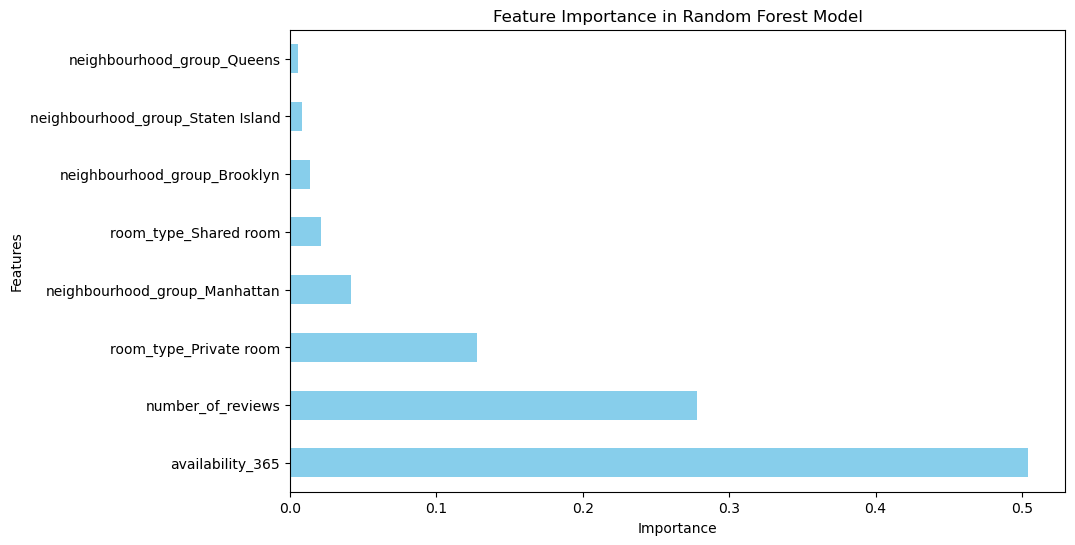

In [724]:
# Feature Importance
plt.figure(figsize=(10, 6))
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
feature_importances.nlargest(10).plot(kind='barh', color='skyblue')
plt.title("Feature Importance in Random Forest Model")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()

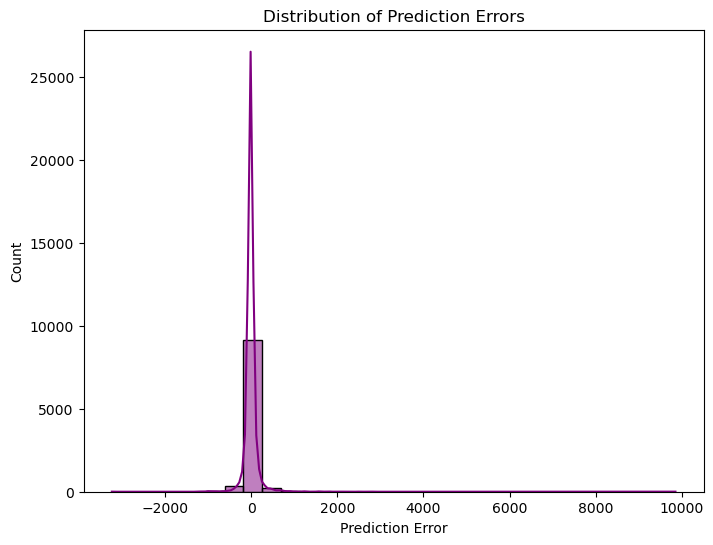

In [725]:
# Error Distribution
plt.figure(figsize=(8, 6))
sns.histplot(y_test - y_pred, bins=30, kde=True, color='purple')
plt.xlabel("Prediction Error")
plt.title("Distribution of Prediction Errors")
plt.show()

### 3. Clustering Model

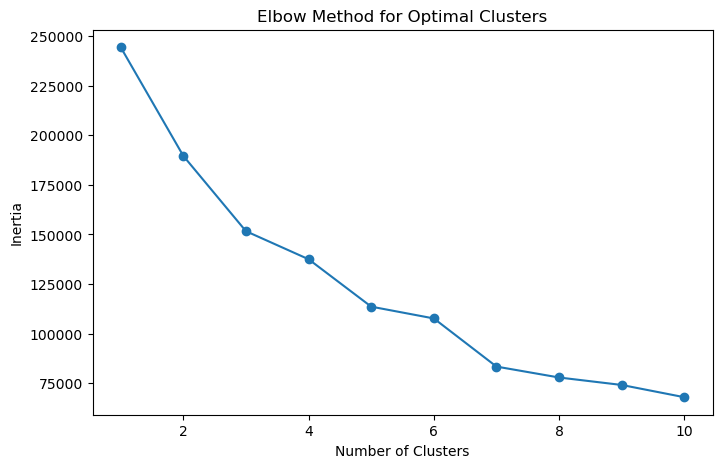

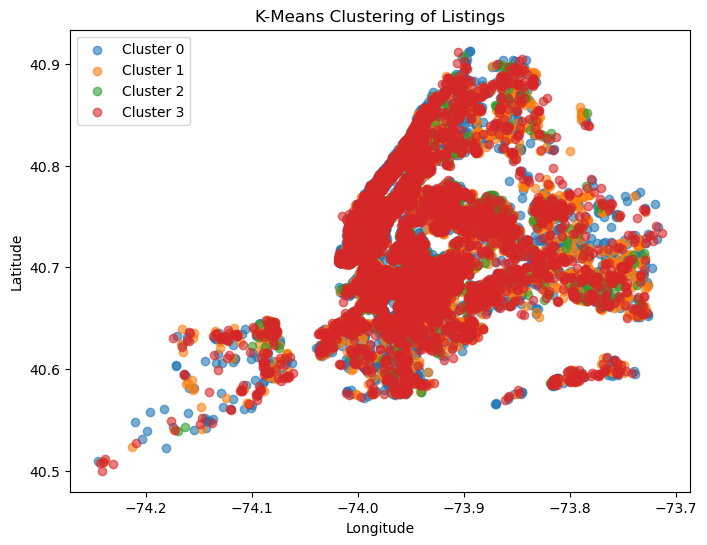

In [727]:
# Import required libraries
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Select features for clustering
clustering_features = ['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'availability_365']

# Standardize the data to improve clustering performance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data[clustering_features])

# Determine the optimal number of clusters using the elbow method
inertia = []
for n in range(1, 11):
    kmeans = KMeans(n_clusters=n, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

# Apply K-Means clustering with an appropriate number of clusters (e.g., 4)
kmeans = KMeans(n_clusters=4, random_state=42)
data['cluster'] = kmeans.fit_predict(X_scaled)

# Visualize the clustering results
plt.figure(figsize=(8, 6))
for cluster in range(4):
    clustered_data = data[data['cluster'] == cluster]
    plt.scatter(clustered_data['longitude'], clustered_data['latitude'], label=f'Cluster {cluster}', alpha=0.6)

plt.title('K-Means Clustering of Listings')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()


In [729]:
print(data.columns)


Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'last review', 'last_review_month', 'total revenue',
       'cluster'],
      dtype='object')


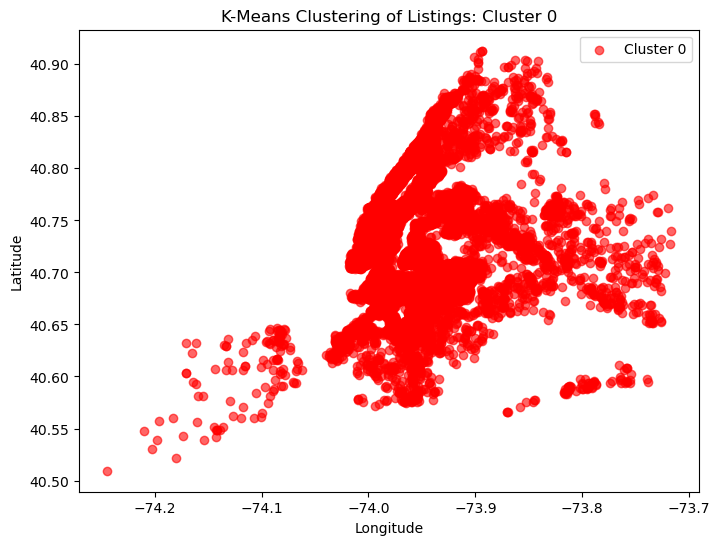

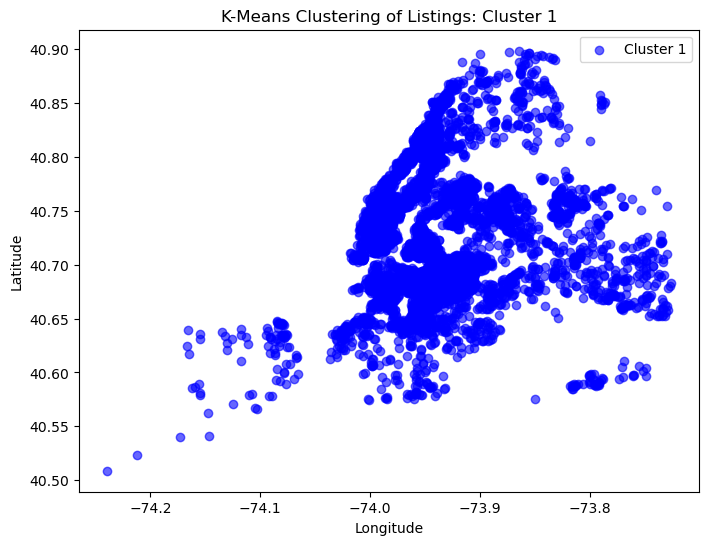

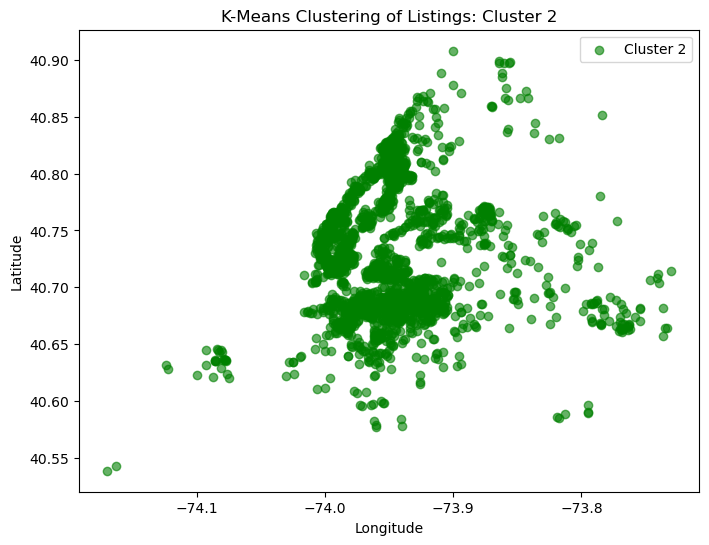

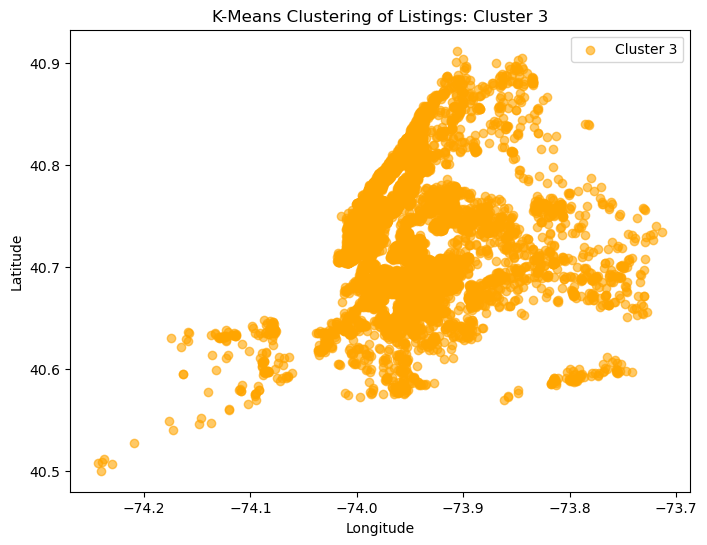

In [733]:
# create a separate chart for each cluster
clusters = [0, 1, 2, 3]
colors = ['red', 'blue', 'green', 'orange']


for cluster, color in zip(clusters, colors):
    clustered_data = data[data['cluster'] == cluster]
    
    plt.figure(figsize=(8, 6))
    plt.scatter(
        clustered_data['longitude'], 
        clustered_data['latitude'], 
        color=color, 
        label=f'Cluster {cluster}', 
        alpha=0.6
    )
    plt.title(f'K-Means Clustering of Listings: Cluster {cluster}')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.legend()
    plt.show()


In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('Airbnb_Open_Data.csv')

# Data Cleaning and Preprocessing
# Convert price and service fee to numeric after removing currency symbols
df["price"] = df["price"].replace(r'[\$,]', '', regex=True).astype(float)
df["service fee"] = df["service fee"].replace(r'[\$,]', '', regex=True).astype(float)

# Drop rows where price is missing
df = df.dropna(subset=["price"])

# Fill missing numerical values with median
num_cols = df.select_dtypes(include=["float64", "int64"]).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

# Fill missing categorical values with mode
cat_cols = df.select_dtypes(include=["object"]).columns
df[cat_cols] = df[cat_cols].fillna(df[cat_cols].mode().iloc[0])

# One-hot encoding categorical variables
df = pd.get_dummies(df, columns=["room type", "instant_bookable", "cancellation_policy", "neighbourhood group"], drop_first=True)

# Drop unnecessary columns
df = df.drop(columns=["id", "NAME", "host id", "host name", "country", "country code", "last review", "house_rules"])

# Define features and target variable
X = df.drop(columns=["price", "neighbourhood", "host_identity_verified"])
y = df["price"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Decision Tree model
dt_model = DecisionTreeRegressor(random_state=42, max_depth=10)
dt_model.fit(X_train, y_train)

# Make predictions
y_pred = dt_model.predict(X_test)

# Evaluate model performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R^2 Score: {r2}")


/var/folders/jt/18cgnf4d5qb5bybq43494v1m0000gn/T/ipykernel_22704/3928706306.py:25: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[cat_cols] = df[cat_cols].fillna(df[cat_cols].mode().iloc[0])


Mean Absolute Error (MAE): 2.1558749794501155
Mean Squared Error (MSE): 355.81998360589233
Root Mean Squared Error (RMSE): 18.863191235999604
R^2 Score: 0.9967757686722202


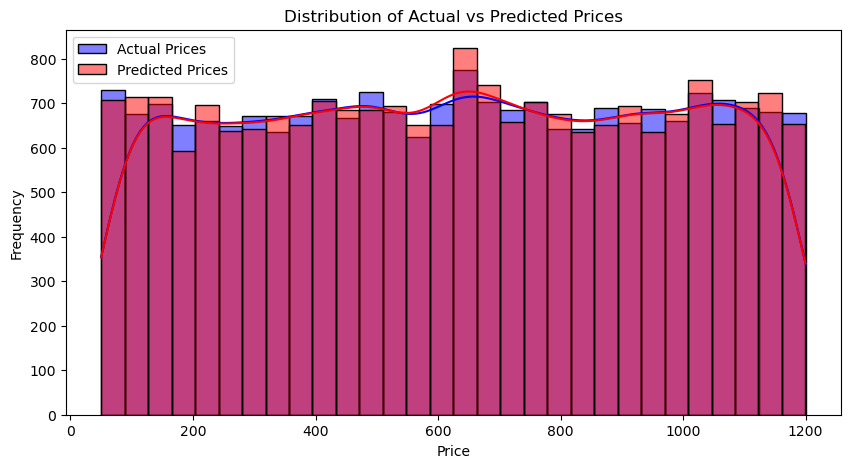

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Feature importance visualization
feature_importances = pd.Series(dt_model.feature_importances_, index=X.columns)
sorted_importances = feature_importances.sort_values(ascending=False)



# Distribution of actual vs predicted prices
plt.figure(figsize=(10, 5))
sns.histplot(y_test, color="blue", label="Actual Prices", kde=True, bins=30)
sns.histplot(y_pred, color="red", label="Predicted Prices", kde=True, bins=30)
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.title("Distribution of Actual vs Predicted Prices")
plt.legend()
plt.show()
